## pip install prince

![test](FactorAnalysis_usecase.jpg)

In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from FactorAnalyzer import FactorAnalyzer # there is a FactorAnalyser.py in the folder
f = FactorAnalyzer()
help(FactorAnalyzer)

Help on class FactorAnalyzer in module FactorAnalyzer:

class FactorAnalyzer(builtins.object)
 |  Methods defined here:
 |  
 |  ca(self, df, col1, col2)
 |      col1, col2: categorical column names
 |      
 |      Do a correspondence analysis
 |  
 |  mca(self, df, cols)
 |      cols: list of categorical column names
 |      
 |      Do a multiple correspondence analysis
 |  
 |  pca(self, n_comp, df, cols=None, excluded_cols=[], color_label=None, plot=True)
 |      n_comp: n principal components
 |      cols: optional, specify which columns. Need to make sure they are numerical
 |      excluded_cols:  if some columns are to be excluded
 |      color_label: categorical data used to color the label. If given, will plot 2D visualization.
 |      plot: boolean, whether to plot
 |          
 |      Performs PCA with k=n_comp principal components on the dataframe df with given cols.
 |      Returns a dictionnary with:
 |      the transformed components, 
 |      the principal components,


# Example

In [5]:
filename ='data/airbnb.csv'
encoding = None
cols = None # Specify if need to consider a subset of columns

df = pd.read_csv(filename,encoding=encoding)
df.head(5)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


# Sparce inverse covariance matrix

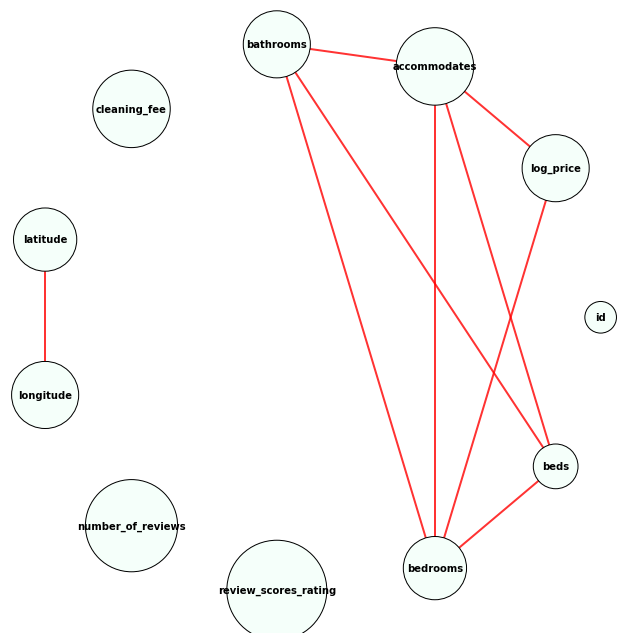

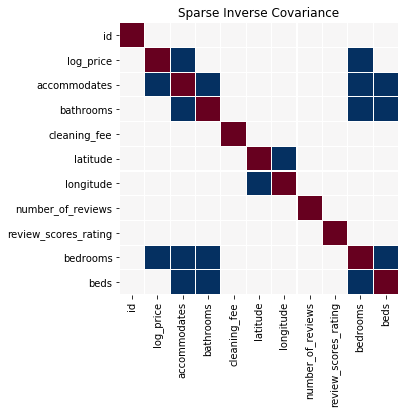

,id,log_price,accommodates,bathrooms,cleaning_fee,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
log_price,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
accommodates,0.0,-1.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0
bathrooms,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0
cleaning_fee,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
latitude,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0
longitude,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0
number_of_reviews,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
review_scores_rating,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
bedrooms,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0


In [5]:
f.sparce_invcov(df, cols = None, style = "GraphLassoCV", param = 0.2, layout = "circular", figsize = (9,9))

# PCA

Explained variation per principal component: [0.31460118 0.18387369 0.1417986  0.09974397 0.07889355 0.06111262
 0.04873371 0.03116748 0.01601059 0.01369183]
Explained total variation: 0.9896272340691787


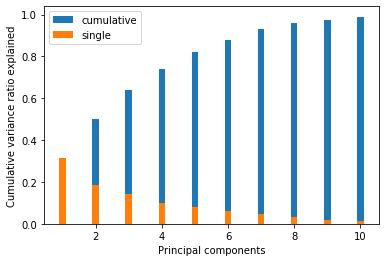

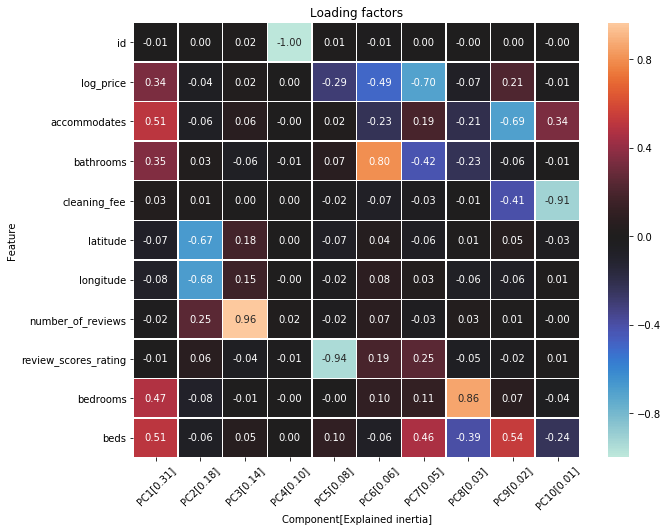

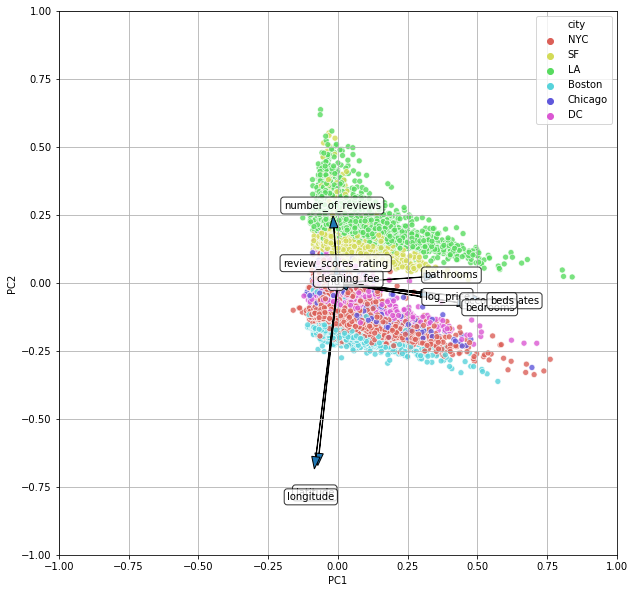

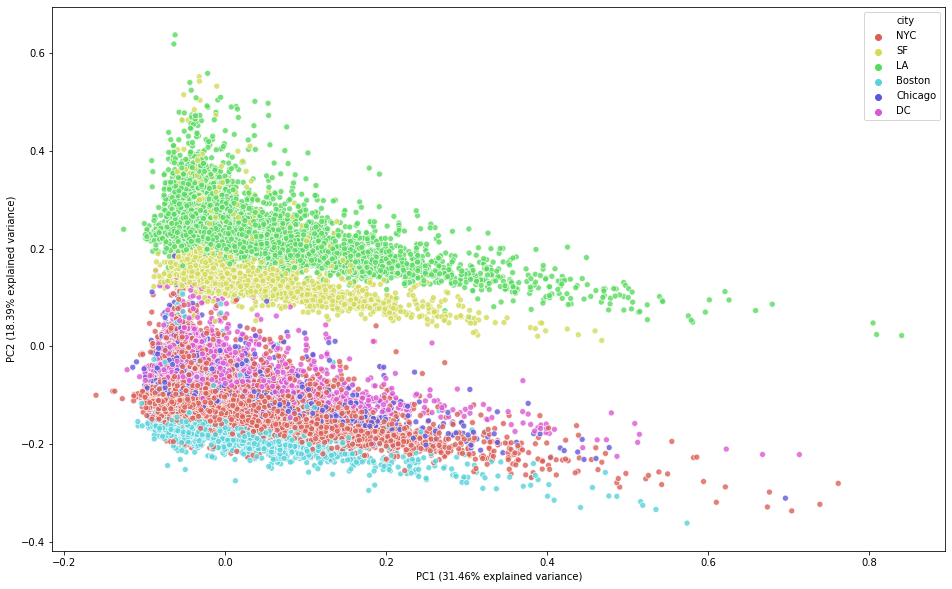

In [42]:
from Utility import Utility
u = Utility()
df = u.normalize(df)
res = f.pca(10, df, cols = cols, color_label = 'city', plot_arrows = True)

Explained variation per principal component: [0.44209632 0.2036649  0.11192242]
Explained total variation: 0.7576836352772909


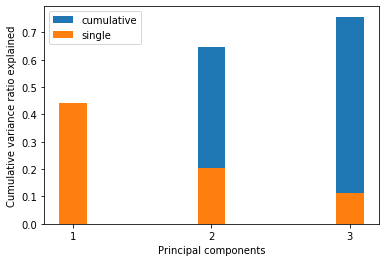

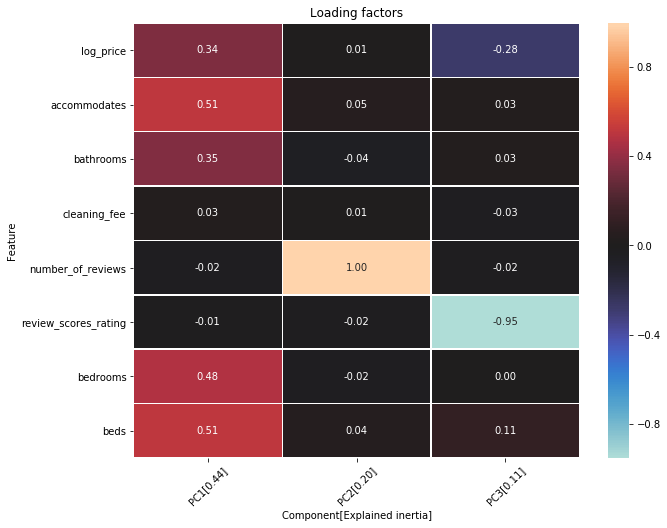

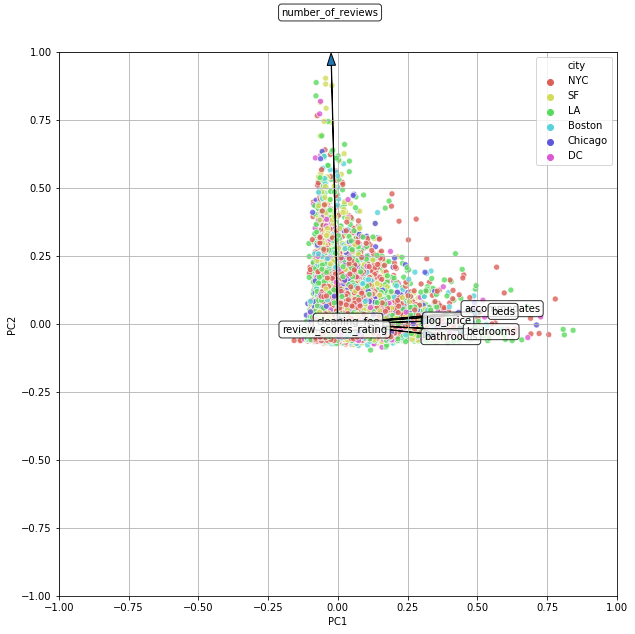

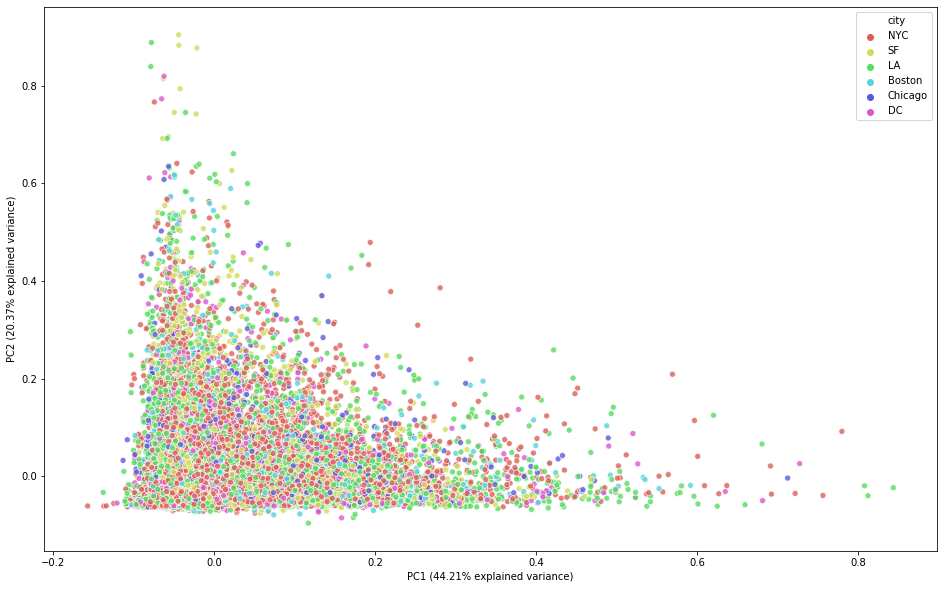

In [46]:
res = f.pca(3, df, cols = cols, color_label = 'city', plot_arrows = True, excluded_cols = ['longitude','latitude','id'])

# TSNE

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 521 samples in 0.002s...
[t-SNE] Computed neighbors for 521 samples in 0.018s...
[t-SNE] Computed conditional probabilities for sample 521 / 521
[t-SNE] Mean sigma: 1.030827
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.552177
[t-SNE] KL divergence after 300 iterations: 0.689703
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 510 samples in 0.001s...
[t-SNE] Computed neighbors for 510 samples in 0.017s...
[t-SNE] Computed conditional probabilities for sample 510 / 510
[t-SNE] Mean sigma: 1.021771
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.834324
[t-SNE] KL divergence after 300 iterations: 0.694824
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 521 samples in 0.001s...
[t-SNE] Computed neighbors for 521 samples in 0.022s...
[t-SNE] Computed conditional probabilities for sample 521 / 521
[t-SNE] Mean sigma: 0.992738
[t-SNE] KL divergence after 250 iterati

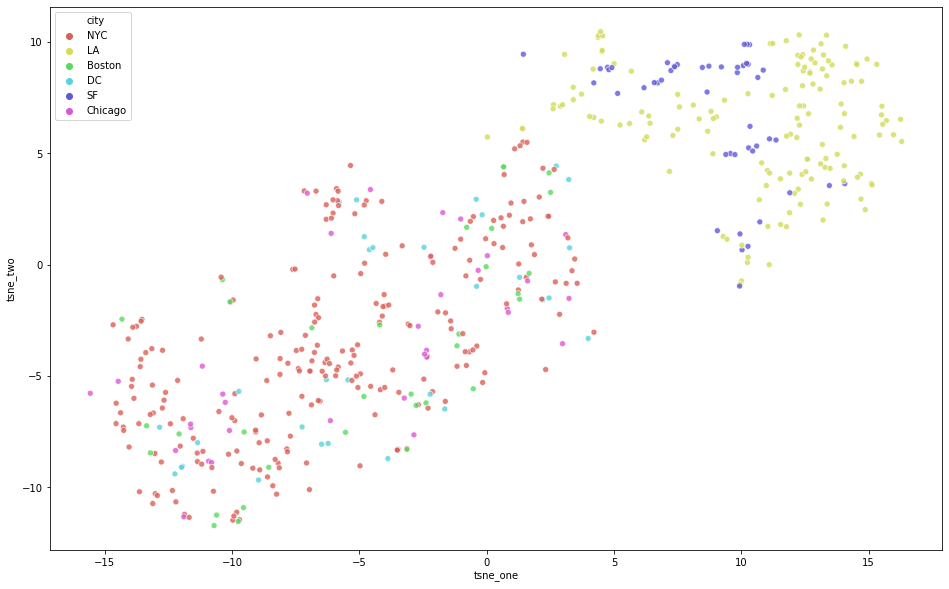

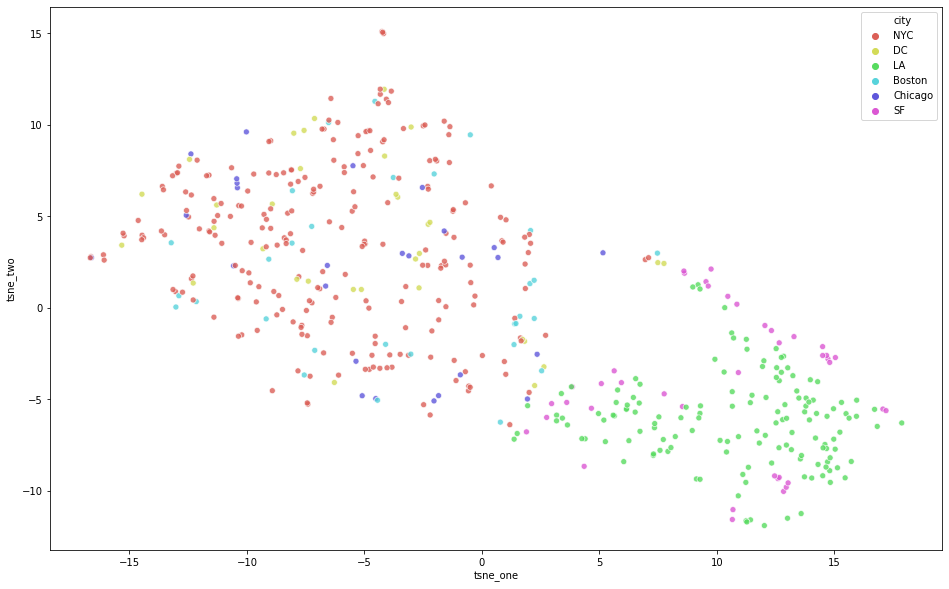

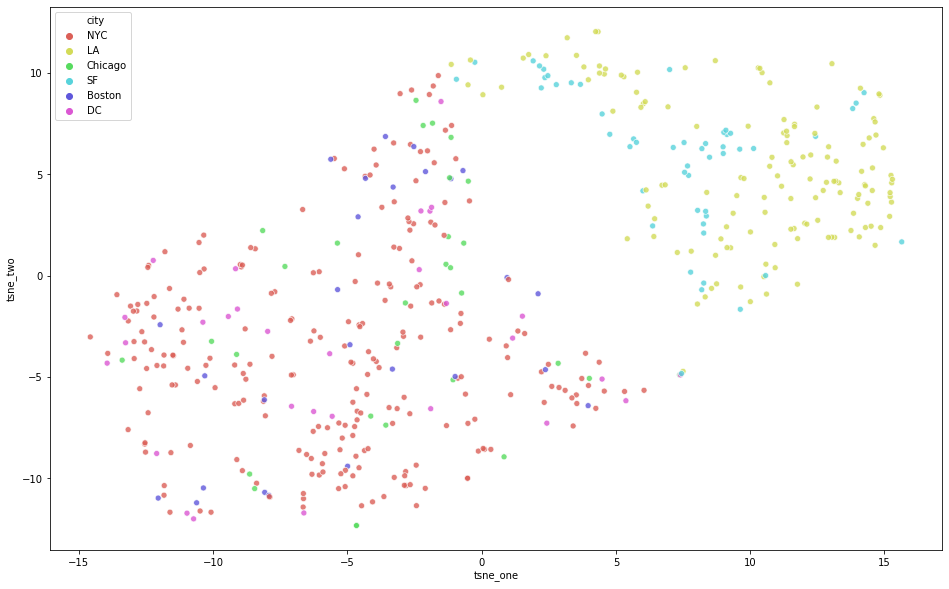

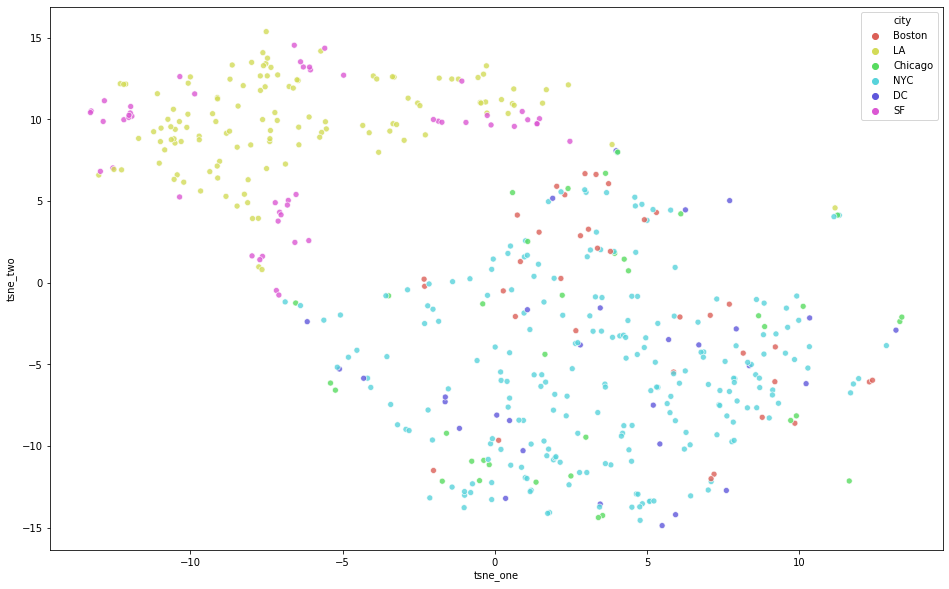

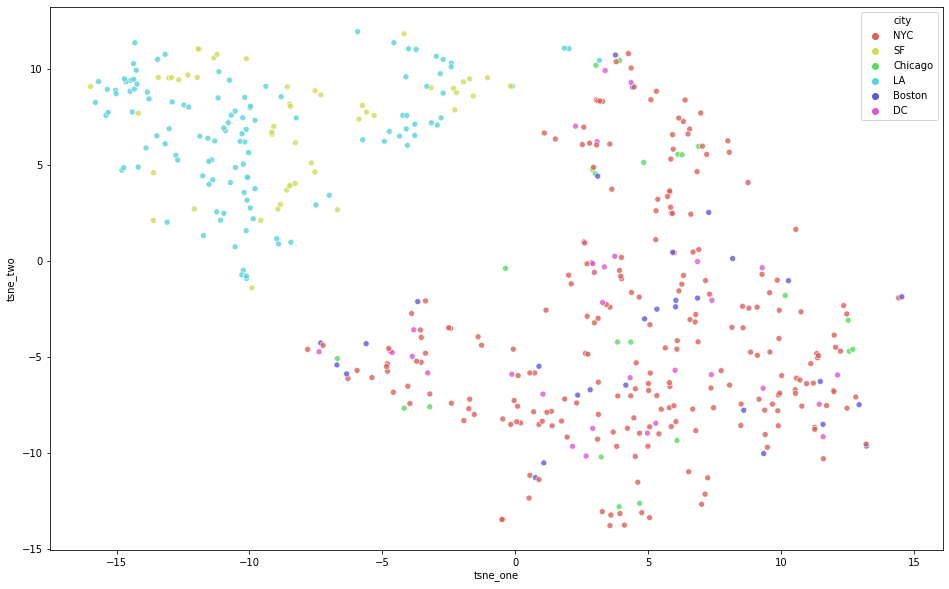

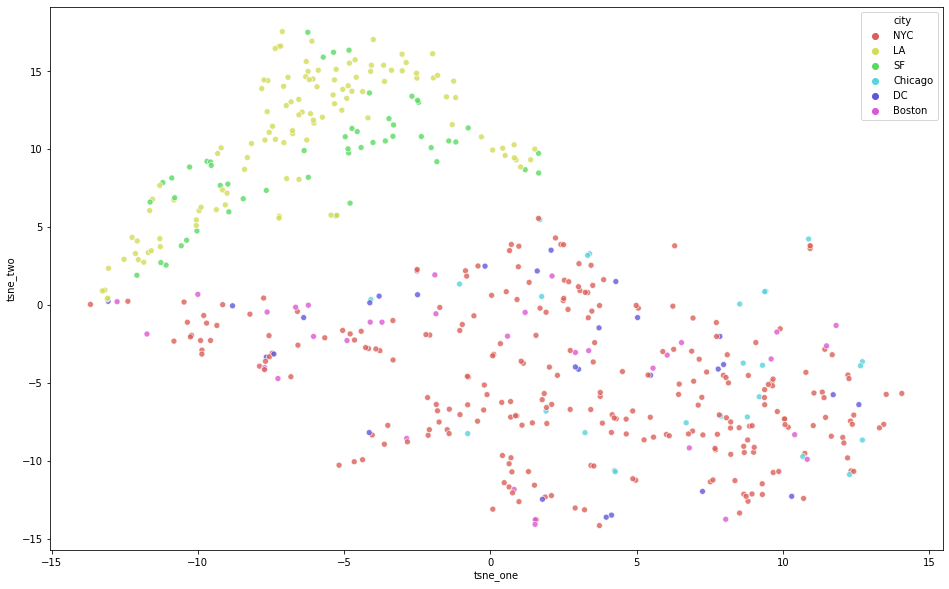

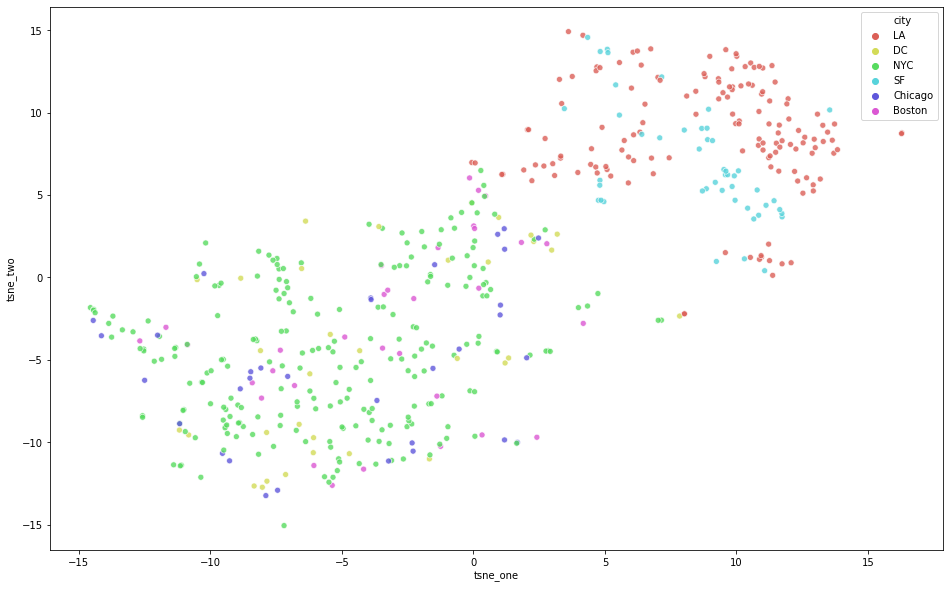

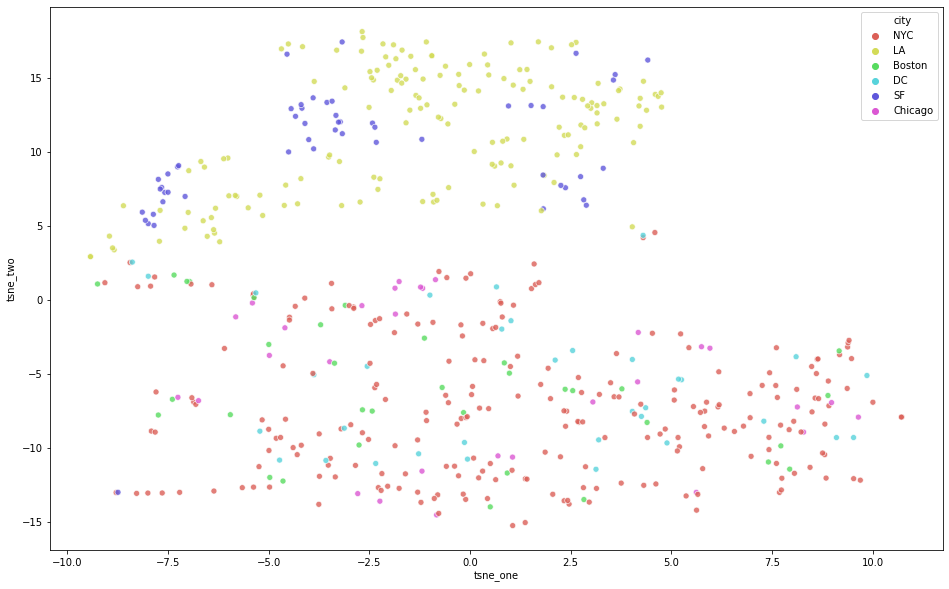

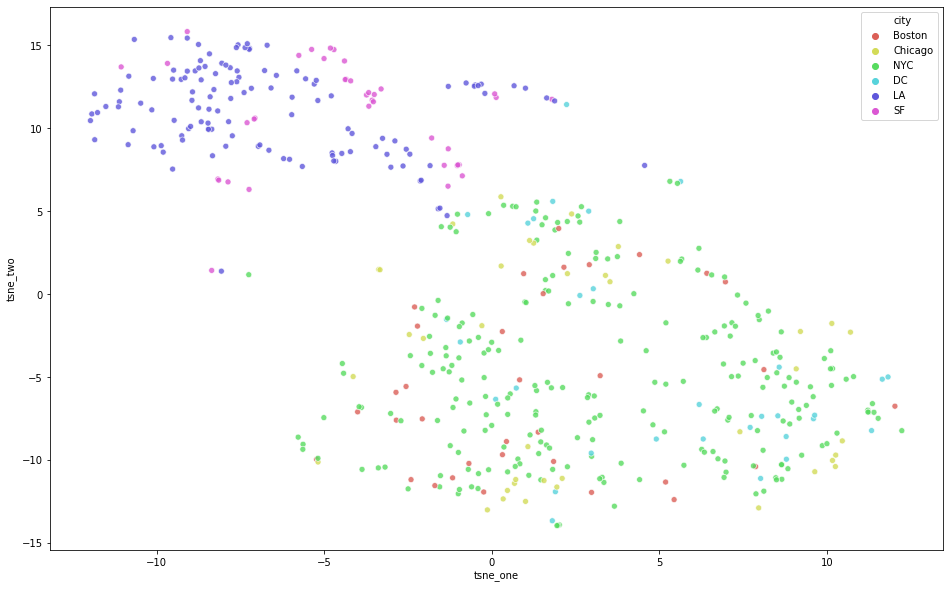

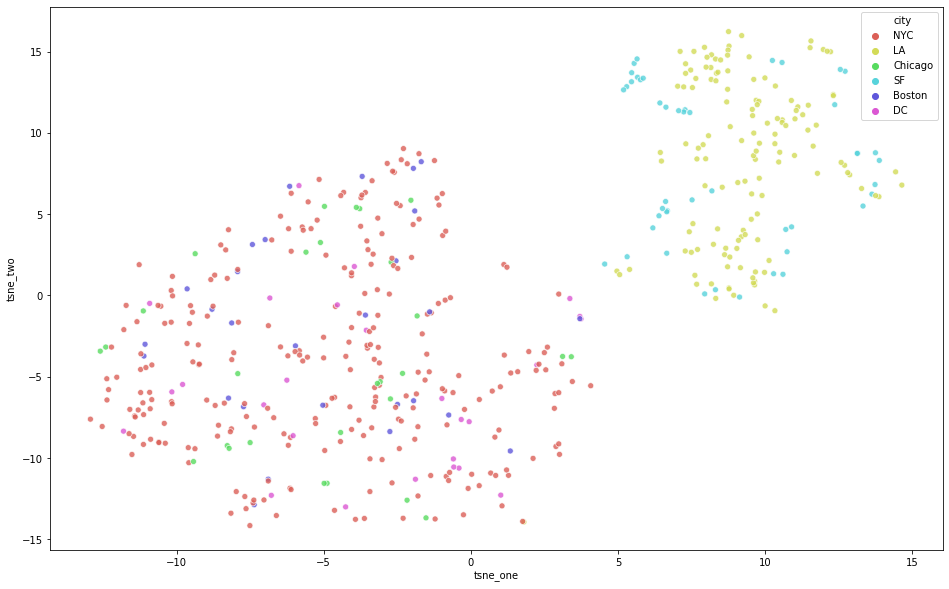

In [5]:
for i in range(10):
    f.tsne(df.sample(1000), cols = cols, color_label = 'city')

# Correspondence analysis

Between two categorial variables

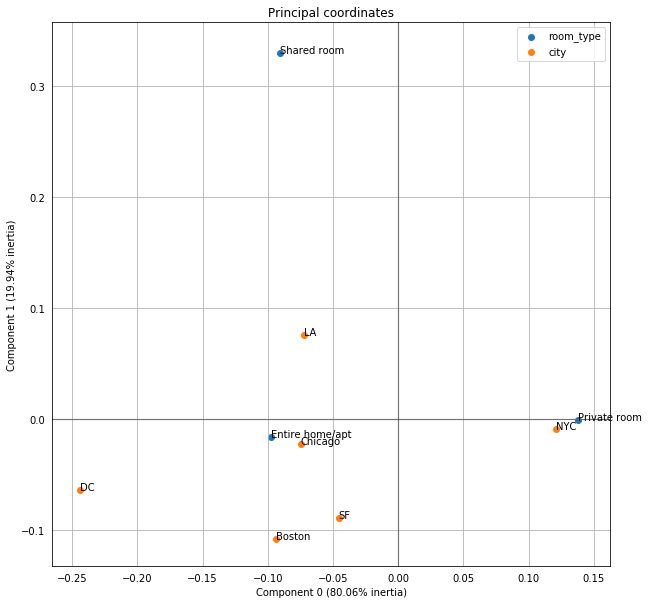

Explained inertia: [0.8005633153975684, 0.19943668460243108]


CA(check_input=True, copy=True, engine='auto', n_components=2, n_iter=3,
  random_state=None)

In [7]:
f.ca(df, col1 = 'room_type', col2 = 'city')

### Numerical vs categorical

In [7]:
from Utility import Utility
u = Utility()
df['log_price_cat'] = u.numerical_to_categorical(df['log_price'])

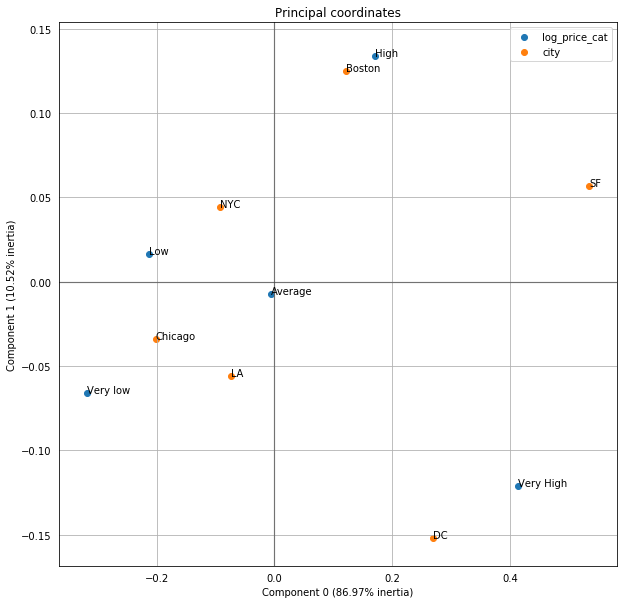

Explained inertia: [0.8696541384641704, 0.10520511843755175]


CA(check_input=True, copy=True, engine='auto', n_components=2, n_iter=3,
  random_state=None)

In [8]:
f.ca(df, 'log_price_cat', 'city')

# MCA

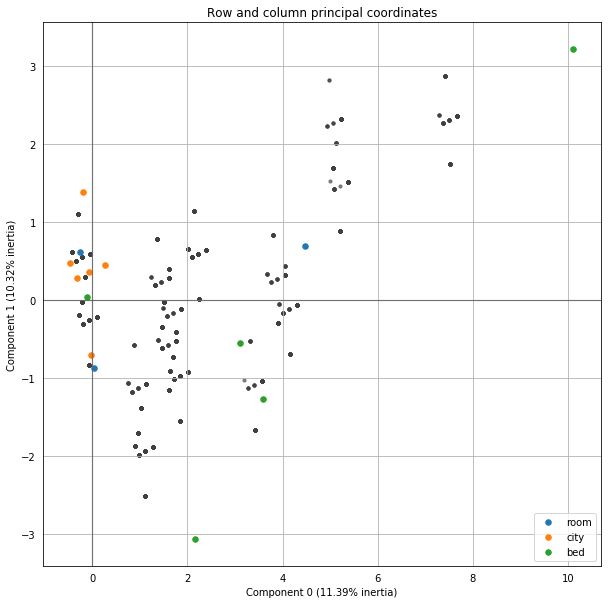

Explained inertia: [0.11388679789810141, 0.1031935498370073]


MCA(check_input=True, copy=True, engine='auto', n_components=2, n_iter=3,
  random_state=None)

In [9]:
f.mca(df, ['room_type','city','bed_type'])